In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
s4_june_df = pd.read_csv('/Volumes/CurtData/Terra-Ref-2020/Ryan-analysis/mldat_june1.csv')

In [3]:
s4_june_df.describe()

range      column  planter_seed_drop  seedling_emergence_rate  \
count  847.000000  847.000000         699.000000                70.000000   
mean    27.969303    8.508855          66.057225                 0.818066   
std     15.288989    4.608000          12.652435                 0.164984   
min      2.000000    1.000000           0.000000                 0.376500   
25%     15.000000    5.000000          62.000000                 0.725562   
50%     28.000000    9.000000          68.500000                 0.829937   
75%     41.000000   12.500000          73.500000                 0.917312   
max     54.000000   16.000000          88.500000                 1.191250   

       emergence_count  canopy_height  canopy_height_diff  \
count        70.000000     725.000000          725.000000   
mean         56.494524      56.342069            2.954483   
std          13.477803      12.952802            1.758676   
min          19.000000      11.000000            2.083333   
25%          50.781250      47.500000            2.083333   
50%          59.500000      56.000000            2.083333   
75%          65.187500      64.000000            2.083333   
max          77.400000     112.500000            6.500000   

       plant_basal_tiller_number  stem_elongated_internodes_number_slope  \
count                  35.000000                               21.000000   
mean                    3.464286                                0.335326   
std                     0.747896                                0.036752   
min                     2.000000                                0.273973   
25%                     3.000000                                0.315068   
50%                     3.333333                                0.340183   
75%                     4.000000                                0.360758   
max                     5.000000                                0.404895   

       canopy_cover  stand_count  stalk_diameter_minor_axis  \
count    108.000000   699.000000                  36.000000   
mean      42.911111    25.500715                  10.790972   
std       10.593915     2.974160                   1.763419   
min       21.500000    12.000000                   8.460000   
25%       35.187500    24.000000                   9.175000   
50%       41.850000    25.000000                  10.670000   
75%       50.162500    27.000000                  12.165000   
max       68.600000    33.500000                  15.400000   

       stalk_diameter_major_axis  leaf_width  leaf_length  \
count                  36.000000   35.000000    35.000000   
mean                   15.430602   57.535238   595.119048   
std                     1.679236    9.866664    81.698619   
min                    12.400000   40.000000   467.500000   
25%                    14.360000   50.125000   540.000000   
50%                    15.105000   58.333333   576.666667   
75%                    16.710000   63.500000   643.750000   
max                    18.680000   80.400000   806.000000   

       aboveground_dry_biomass  
count               703.000000  
mean              22336.724040  
std                9681.393585  
min                1137.000000  
25%               15725.000000  
50%               21870.000000  
75%               28135.000000  
max               61030.000000

In [4]:
s4_june_df.dtypes

sitename2                                  object
range                                       int64
column                                      int64
planter_seed_drop                         float64
seedling_emergence_rate                   float64
emergence_count                           float64
canopy_height                             float64
canopy_height_diff                        float64
plant_basal_tiller_number                 float64
stem_elongated_internodes_number_slope    float64
canopy_cover                              float64
stand_count                               float64
stalk_diameter_minor_axis                 float64
stalk_diameter_major_axis                 float64
leaf_width                                float64
leaf_length                               float64
aboveground_dry_biomass                   float64
dtype: object

In [5]:
def returnUniqueCounts(dframe):
    return pd.DataFrame.from_records([(col, dframe[col].nunique()) for col in dframe.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [6]:
returnUniqueCounts(s4_june_df)

Column_Name  Num_Unique
7                       canopy_height_diff           2
8                plant_basal_tiller_number          12
2                                   column          16
9   stem_elongated_internodes_number_slope          21
15                             leaf_length          28
14                              leaf_width          29
13               stalk_diameter_major_axis          34
12               stalk_diameter_minor_axis          36
11                             stand_count          38
1                                    range          53
5                          emergence_count          68
4                  seedling_emergence_rate          70
10                            canopy_cover          97
3                        planter_seed_drop         107
6                            canopy_height         119
16                 aboveground_dry_biomass         638
0                                sitename2         847

It looks like there are a few rows there the final dry_biomass wasn't declared.  Lets try to find these rows and remove them, so we have a valid testing dataset.

In [7]:
# generate a mask showing which rows in the dataframe have valid target values
biomass_notna = s4_june_df['aboveground_dry_biomass'].notna()
# now generate a filtered dataframe with that condition, so the target is always defined
drop_target_na = s4_june_df.loc[biomass_notna]
# 
print('the original df had this many rows:',biomass_notna.shape[0])
print('shape after dropping undefined biomass entries:',drop_target_na.shape)
print('so we dropped',biomass_notna.shape[0]-drop_target_na.shape[0],' missing target values')

the original df had this many rows: 847
shape after dropping undefined biomass entries: (703, 17)
so we dropped 144  missing target values


In [8]:
drop_target_na.head()

sitename2  range  column  \
0   MAC Field Scanner Season 4 Range 8 Column 8      8       8   
1   MAC Field Scanner Season 4 Range 8 Column 9      8       9   
2  MAC Field Scanner Season 4 Range 8 Column 10      8      10   
3  MAC Field Scanner Season 4 Range 8 Column 12      8      12   
4   MAC Field Scanner Season 4 Range 9 Column 3      9       3   

   planter_seed_drop  seedling_emergence_rate  emergence_count  canopy_height  \
0               73.0                      NaN              NaN           46.5   
1               76.0                      NaN              NaN           55.5   
2               54.0                   0.3765             19.0           50.5   
3               61.0                      NaN              NaN           59.0   
4               35.5                      NaN              NaN           46.0   

   canopy_height_diff  plant_basal_tiller_number  \
0            2.083333                        NaN   
1            2.083333                        NaN   
2            2.083333                        NaN   
3            2.083333                        NaN   
4            2.083333                        3.5   

   stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
0                                     NaN           NaN         22.0   
1                                     NaN           NaN         25.0   
2                                     NaN         27.40         17.5   
3                                     NaN           NaN         22.5   
4                                     NaN         37.95         24.5   

   stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
0                        NaN                        NaN         NaN   
1                        NaN                        NaN         NaN   
2                        NaN                        NaN         NaN   
3                        NaN                        NaN         NaN   
4                       8.92                      14.36        45.5   

   leaf_length  aboveground_dry_biomass  
0          NaN                  15460.0  
1          NaN                  34810.0  
2          NaN                   7531.0  
3          NaN                  25720.0  
4        555.0                  18450.0

make a dataframe of just the columns we need to train on (remove the sitename, range, column, biomass).  We do this by making a list of columns to drop, then iterating through the source dataframe columns and only putting them in the list if the column is not a match with a "column to drop".  Then we can pass this list as an argument to the source dataframe to make our training dataframe with a subset of columns.

In [9]:

colsToDrop = ['sitename2','range','column','aboveground_dry_biomass']
colsLeft = [(x) for x in drop_target_na.columns if (x not in colsToDrop)]
print(colsLeft)
train_df_na = drop_target_na[colsLeft]
print(train_df_na.shape)

['planter_seed_drop', 'seedling_emergence_rate', 'emergence_count', 'canopy_height', 'canopy_height_diff', 'plant_basal_tiller_number', 'stem_elongated_internodes_number_slope', 'canopy_cover', 'stand_count', 'stalk_diameter_minor_axis', 'stalk_diameter_major_axis', 'leaf_width', 'leaf_length']
(703, 13)


In [10]:
train_df_na.head()

planter_seed_drop  seedling_emergence_rate  emergence_count  canopy_height  \
0               73.0                      NaN              NaN           46.5   
1               76.0                      NaN              NaN           55.5   
2               54.0                   0.3765             19.0           50.5   
3               61.0                      NaN              NaN           59.0   
4               35.5                      NaN              NaN           46.0   

   canopy_height_diff  plant_basal_tiller_number  \
0            2.083333                        NaN   
1            2.083333                        NaN   
2            2.083333                        NaN   
3            2.083333                        NaN   
4            2.083333                        3.5   

   stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
0                                     NaN           NaN         22.0   
1                                     NaN           NaN         25.0   
2                                     NaN         27.40         17.5   
3                                     NaN           NaN         22.5   
4                                     NaN         37.95         24.5   

   stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
0                        NaN                        NaN         NaN   
1                        NaN                        NaN         NaN   
2                        NaN                        NaN         NaN   
3                        NaN                        NaN         NaN   
4                       8.92                      14.36        45.5   

   leaf_length  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4        555.0

**temporarily remove NaNs by filling with mean values.  This is a fudge.  the xgboost implementation of XGBoost is supposed to be tolerant of NAs, but scikit-learns is not**

In [11]:
train_df = train_df_na.fillna(train_df_na.mean())

Pick the target column values to be the Y variable in the model training process

In [12]:
target_df = drop_target_na['aboveground_dry_biomass']
target_df.head()

0    15460.0
1    34810.0
2     7531.0
3    25720.0
4    18450.0
Name: aboveground_dry_biomass, dtype: float64

In [13]:
X_train = train_df.values
y_train = target_df.values
print(X_train.shape)
print(y_train.shape)

(703, 13)
(703,)


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
#import xgboost

tree = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
#svm_mod = svm.SVR().fit(X_train, y_train)
gbr_mod = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls').fit(X_train, y_train)

pred_tree = tree.predict(X_train)
pred_lr = linear_reg.predict(X_train)
#pred_svm = svm_mod.predict(X_train)
pred_gbr = gbr_mod.predict(X_train)


In [15]:
result = train_df
result['aboveground_dry_biomass'] = drop_target_na['aboveground_dry_biomass']
result['range'] = drop_target_na['range']
result['column'] = drop_target_na['column']
result['decision_tree'] = pred_tree
result['linearRegression'] = pred_lr
#cdf['svm'] = pred_svm
result['gboost'] = pred_gbr
result.head()

planter_seed_drop  seedling_emergence_rate  emergence_count  canopy_height  \
0               73.0                 0.813284        56.501741           46.5   
1               76.0                 0.813284        56.501741           55.5   
2               54.0                 0.376500        19.000000           50.5   
3               61.0                 0.813284        56.501741           59.0   
4               35.5                 0.813284        56.501741           46.0   

   canopy_height_diff  plant_basal_tiller_number  \
0            2.083333                   3.477941   
1            2.083333                   3.477941   
2            2.083333                   3.477941   
3            2.083333                   3.477941   
4            2.083333                   3.500000   

   stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
0                                0.335326     42.946154         22.0   
1                                0.335326     42.946154         25.0   
2                                0.335326     27.400000         17.5   
3                                0.335326     42.946154         22.5   
4                                0.335326     37.950000         24.5   

   stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
0                  10.807857                  15.435048   57.536275   
1                  10.807857                  15.435048   57.536275   
2                  10.807857                  15.435048   57.536275   
3                  10.807857                  15.435048   57.536275   
4                   8.920000                  14.360000   45.500000   

   leaf_length  aboveground_dry_biomass  range  column  decision_tree  \
0   597.034314                  15460.0      8       8   28327.647059   
1   597.034314                  34810.0      8       9   21970.744318   
2   597.034314                   7531.0      8      10    7531.000000   
3   597.034314                  25720.0      8      12   26113.500000   
4   555.000000                  18450.0      9       3   15926.500000   

   linearRegression        gboost  
0      23126.175253  18408.661874  
1      23014.425244  28814.284727  
2      20477.566716   8050.358999  
3      23648.454637  23308.984731  
4      17812.324815  18405.674028

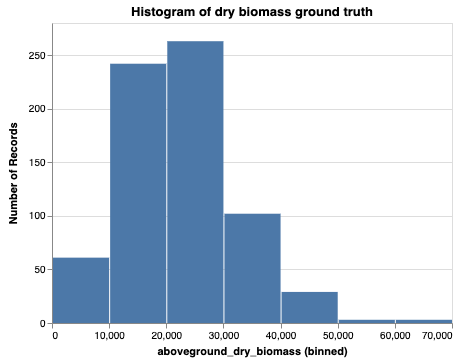

In [16]:
alt.Chart(result,title="Histogram of dry biomass ground truth").mark_bar().encode(
    alt.X("aboveground_dry_biomass:Q", bin=True),
    y='count()'
)

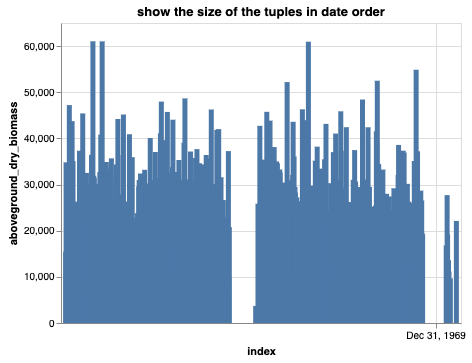

In [17]:
alt.Chart(result.reset_index(),title="show the size of the tuples in date order").mark_bar().encode(
    alt.Y("aboveground_dry_biomass:Q"),
    alt.X('index:T')
)

It seems unusual to see the gap in values, but I assume this is because we masked away when the biomass as NaN earlier.  Lets compare with the original dataframe, before we masked away the NAs.

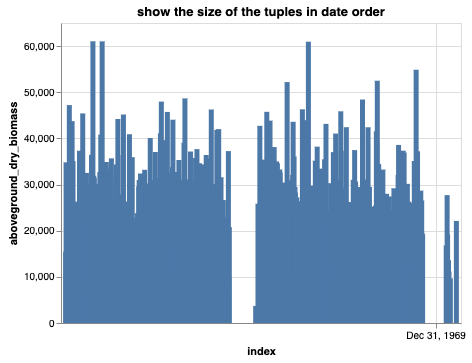

In [18]:
alt.Chart(s4_june_df.reset_index(),title="show the size of the tuples in date order").mark_bar().encode(
    alt.Y("aboveground_dry_biomass:Q"),
    alt.X('index:T'),
    tooltip=[
        alt.Tooltip('aboveground_dry_biomass', title='biomass'),
        alt.Tooltip('index',title='index'),
    ]
)

In [19]:
result.iloc[340:350]

planter_seed_drop  seedling_emergence_rate  emergence_count  \
346               78.5                 0.813284        56.501741   
347               60.0                 0.813284        56.501741   
349               75.5                 0.813284        56.501741   
350               74.5                 0.466375        34.000000   
351               72.5                 0.946250        67.750000   
352               46.0                 0.604625        26.800000   
353               72.5                 0.813284        56.501741   
354               70.0                 0.813284        56.501741   
411               46.0                 0.813284        56.501741   
416               71.5                 0.788625        58.750000   

     canopy_height  canopy_height_diff  plant_basal_tiller_number  \
346           55.0            2.083333                   3.477941   
347           72.0            2.083333                   3.477941   
349           54.0            2.083333                   3.477941   
350           44.5            2.083333                   3.477941   
351           58.0            2.083333                   3.000000   
352           59.0            2.083333                   4.666667   
353           67.0            2.083333                   3.477941   
354           47.0            2.083333                   3.477941   
411           50.5            2.083333                   3.477941   
416           60.0            2.083333                   4.000000   

     stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
346                                0.335326     42.946154         25.0   
347                                0.335326     28.550000         30.5   
349                                0.335326     42.946154         25.0   
350                                0.335326     22.500000         21.0   
351                                0.340183     39.700000         25.5   
352                                0.315068     41.450000         22.0   
353                                0.335326     26.200000         25.0   
354                                0.335326     40.950000         33.5   
411                                0.335326     42.946154         23.0   
416                                0.393581     37.600000         25.5   

     stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
346                  10.807857                  15.435048   57.536275   
347                  10.807857                  15.435048   57.536275   
349                  10.807857                  15.435048   57.536275   
350                   9.860000                  15.040000   57.536275   
351                  10.940000                  15.160000   63.000000   
352                   9.560000                  15.220000   45.000000   
353                  10.807857                  15.435048   57.536275   
354                  10.807857                  15.435048   57.536275   
411                  10.807857                  15.435048   57.536275   
416                   9.460000                  14.360000   40.000000   

     leaf_length  aboveground_dry_biomass  range  column  decision_tree  \
346   597.034314                  22850.0     30      13   21970.744318   
347   597.034314                  11110.0     20       3    7667.333333   
349   597.034314                  12940.0     30       9   21970.744318   
350   597.034314                  12780.0     10       4   12780.000000   
351   540.000000                  16680.0     50       6   16053.750000   
352   543.333333                  37240.0     21       8   37240.000000   
353   597.034314                   9948.0     46      14   10789.000000   
354   597.034314                  20730.0     29      11   20385.761194   
411   597.034314                   3696.0     20       6    9540.500000   
416   473.333333                  25830.0     30      15   25082.515528   

     linearRegression        gboost  
346      2314

See above, where the index goes from 354 straight to 411.  This marks a place that was masked out in the index, due to the biomass value being NA.  See how these values are missing in the original dataframe, when we look at it.  That is why they don't show in the histogram.

In [20]:
s4_june_df.iloc[350:360]

sitename2  range  column  \
350   MAC Field Scanner Season 4 Range 10 Column 4     10       4   
351   MAC Field Scanner Season 4 Range 50 Column 6     50       6   
352   MAC Field Scanner Season 4 Range 21 Column 8     21       8   
353  MAC Field Scanner Season 4 Range 46 Column 14     46      14   
354  MAC Field Scanner Season 4 Range 29 Column 11     29      11   
355   MAC Field Scanner Season 4 Range 5 Column 16      5      16   
356   MAC Field Scanner Season 4 Range 24 Column 1     24       1   
357   MAC Field Scanner Season 4 Range 53 Column 1     53       1   
358  MAC Field Scanner Season 4 Range 15 Column 16     15      16   
359  MAC Field Scanner Season 4 Range 22 Column 16     22      16   

     planter_seed_drop  seedling_emergence_rate  emergence_count  \
350               74.5                 0.466375            34.00   
351               72.5                 0.946250            67.75   
352               46.0                 0.604625            26.80   
353               72.5                      NaN              NaN   
354               70.0                      NaN              NaN   
355                NaN                      NaN              NaN   
356                NaN                      NaN              NaN   
357                NaN                      NaN              NaN   
358                NaN                      NaN              NaN   
359                NaN                      NaN              NaN   

     canopy_height  canopy_height_diff  plant_basal_tiller_number  \
350           44.5            2.083333                        NaN   
351           58.0            2.083333                   3.000000   
352           59.0            2.083333                   4.666667   
353           67.0            2.083333                        NaN   
354           47.0            2.083333                        NaN   
355            NaN                 NaN                        NaN   
356            NaN                 NaN                        NaN   
357            NaN                 NaN                        NaN   
358            NaN                 NaN                        NaN   
359            NaN                 NaN                        NaN   

     stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
350                                     NaN         22.50         21.0   
351                                0.340183         39.70         25.5   
352                                0.315068         41.45         22.0   
353                                     NaN         26.20         25.0   
354                                     NaN         40.95         33.5   
355                                     NaN           NaN          NaN   
356                                     NaN           NaN          NaN   
357                                     NaN           NaN          NaN   
358                                     NaN           NaN          NaN   
359                                     NaN           NaN          NaN   

     stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
350                       9.86                      15.04         NaN   
351                      10.94                      15.16        63.0   
352                       9.56                      15.22        45.0   
353                        NaN                        NaN         NaN   
354                        NaN                        NaN         NaN   
355                        NaN                        NaN         NaN   
356                        NaN                        NaN         NaN   
357                        NaN                        NaN         NaN   
358                        NaN                        NaN         NaN   
359                        NaN                        NaN         NaN   

     leaf_length  aboveground_dry_biomass  
350          NaN                  12780.0  
351   540.000000                  16680.0  
352   543.333333     

there are some legitimate but low values, too.  These seem to be values where the models miss by a larger margin. 

In [21]:

result.loc[result['aboveground_dry_biomass']< 5000]

planter_seed_drop  seedling_emergence_rate  emergence_count  \
29                57.5                 0.813284        56.501741   
132               61.0                 0.813284        56.501741   
146               75.0                 0.813284        56.501741   
226               73.5                 0.813284        56.501741   
411               46.0                 0.813284        56.501741   
421               68.0                 0.813284        56.501741   
447               50.0                 0.813284        56.501741   
615               73.5                 0.813284        56.501741   
624               80.5                 0.813284        56.501741   
629               43.5                 0.813284        56.501741   
640               72.5                 0.813284        56.501741   

     canopy_height  canopy_height_diff  plant_basal_tiller_number  \
29            53.0            2.083333                   3.477941   
132           53.0            2.083333                   3.477941   
146          112.5            2.083333                   3.477941   
226           54.5            2.083333                   3.477941   
411           50.5            2.083333                   3.477941   
421           38.0            2.083333                   3.477941   
447           76.0            2.083333                   3.477941   
615           59.5            2.083333                   3.477941   
624           56.0            2.083333                   3.477941   
629           55.0            6.500000                   3.477941   
640           47.5            2.083333                   3.477941   

     stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
29                                 0.335326     42.946154         26.0   
132                                0.335326     42.946154         26.0   
146                                0.335326     42.946154         32.0   
226                                0.335326     42.946154         25.5   
411                                0.335326     42.946154         23.0   
421                                0.335326     42.946154         24.0   
447                                0.335326     42.946154         20.5   
615                                0.335326     42.946154         25.0   
624                                0.335326     44.750000         26.5   
629                                0.335326     56.200000         25.5   
640                                0.335326     42.946154         27.0   

     stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
29                   10.807857                  15.435048   57.536275   
132                  10.807857                  15.435048   57.536275   
146                  10.807857                  15.435048   57.536275   
226                  10.807857                  15.435048   57.536275   
411                  10.807857                  15.435048   57.536275   
421                  10.807857                  15.435048   57.536275   
447                  10.807857                  15.435048   57.536275   
615                  10.807857                  15.435048   57.536275   
624                  10.807857                  15.435048   57.536275   
629                  10.807857                  15.435048   57.536275   
640                  10.807857                  15.435048   57.536275   

     leaf_length  aboveground_dry_biomass  range  column  decision_tree  \
29    597.034314                   2252.0     12       2   21970.744318   
132   597.034314                   4039.0     26      10   21970.744318   
146   597.034314                   1244.0     29       3    1244.000000   
226   597.034314                   1466.0     43      10   21970.744318   
411   597.034314                   3696.0     20       6    9540.500000   
421   597.034314                   1673.0      9      10    3966.000000   
447   597.034314                   1137.0     14       2   26113.500

In [22]:
for name, importance in zip(train_df.columns, gbr_mod.feature_importances_):
        print(name, "=", importance)

planter_seed_drop = 0.3051253385170441
seedling_emergence_rate = 0.0329329446207741
emergence_count = 0.030095074155688607
canopy_height = 0.2974835599585564
canopy_height_diff = 0.020092237426529165
plant_basal_tiller_number = 0.0027556655987064425
stem_elongated_internodes_number_slope = 0.0009923291215303738
canopy_cover = 0.05394204492613399
stand_count = 0.23673478324486974
stalk_diameter_minor_axis = 0.010246313660762127
stalk_diameter_major_axis = 0.0030050479573752935
leaf_width = 0.004025542276506549
leaf_length = 0.0025691185355232672


In [23]:
plotdf = result
# calculate the percentage error between the actual and the model
plotdf['abserror_gboost'] = 100.0*abs(plotdf['aboveground_dry_biomass']-plotdf['gboost'])/plotdf['aboveground_dry_biomass']
plotdf.head()

planter_seed_drop  seedling_emergence_rate  emergence_count  canopy_height  \
0               73.0                 0.813284        56.501741           46.5   
1               76.0                 0.813284        56.501741           55.5   
2               54.0                 0.376500        19.000000           50.5   
3               61.0                 0.813284        56.501741           59.0   
4               35.5                 0.813284        56.501741           46.0   

   canopy_height_diff  plant_basal_tiller_number  \
0            2.083333                   3.477941   
1            2.083333                   3.477941   
2            2.083333                   3.477941   
3            2.083333                   3.477941   
4            2.083333                   3.500000   

   stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
0                                0.335326     42.946154         22.0   
1                                0.335326     42.946154         25.0   
2                                0.335326     27.400000         17.5   
3                                0.335326     42.946154         22.5   
4                                0.335326     37.950000         24.5   

   stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
0                  10.807857                  15.435048   57.536275   
1                  10.807857                  15.435048   57.536275   
2                  10.807857                  15.435048   57.536275   
3                  10.807857                  15.435048   57.536275   
4                   8.920000                  14.360000   45.500000   

   leaf_length  aboveground_dry_biomass  range  column  decision_tree  \
0   597.034314                  15460.0      8       8   28327.647059   
1   597.034314                  34810.0      8       9   21970.744318   
2   597.034314                   7531.0      8      10    7531.000000   
3   597.034314                  25720.0      8      12   26113.500000   
4   555.000000                  18450.0      9       3   15926.500000   

   linearRegression        gboost  abserror_gboost  
0      23126.175253  18408.661874        19.072845  
1      23014.425244  28814.284727        17.224117  
2      20477.566716   8050.358999         6.896282  
3      23648.454637  23308.984731         9.374087  
4      17812.324815  18405.674028         0.240249

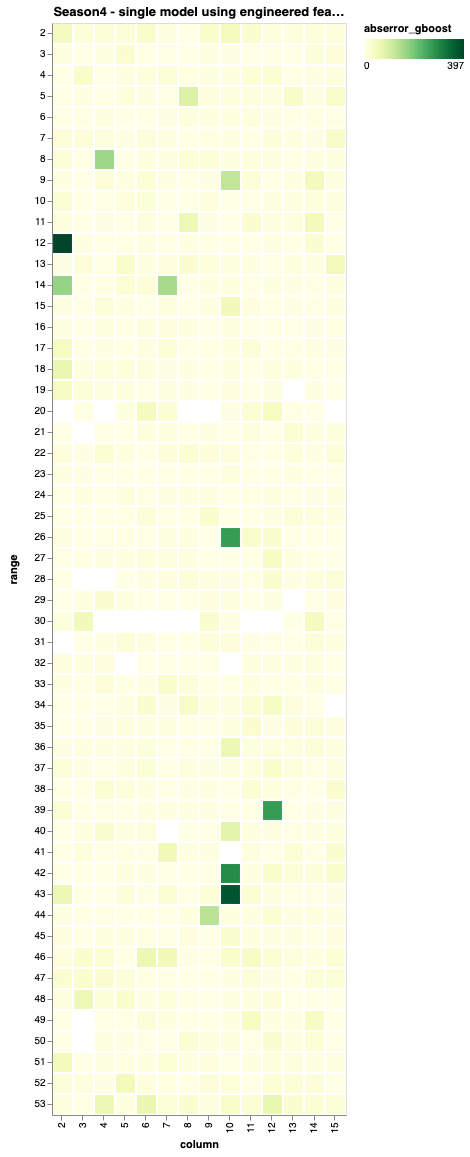

In [38]:
import altair as alt
alt.Chart(plotdf,title='Season4 - single model using engineered features').mark_rect().encode(
    x='column:O',
    y='range:O',
    #color='abserror_gboost',
    color=alt.Color('abserror_gboost',scale=alt.Scale(scheme='yellowgreen')),
    tooltip=[
        #alt.Tooltip('cultivar:Q', title='Cultivar'),
        alt.Tooltip('abserror_gboost', title='Abs Err %'),
        alt.Tooltip('range',title='range'),
        alt.Tooltip('column',title='column')
    ]
)

#### choose the color for the rendering by specifying the scale in the alt.Color() option.  See here: https://vega.github.io/vega/docs/schemes/

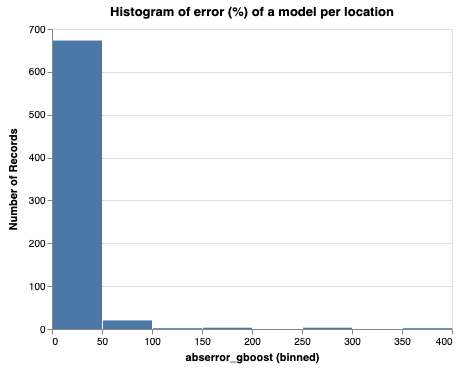

In [25]:

alt.Chart(plotdf,title="Histogram of error (%) of a model per location").mark_bar().encode(
    alt.X("abserror_gboost:Q", bin=True),
    y='count()',
)

In [26]:
closer_predicts = plotdf.loc[plotdf['abserror_gboost']<50.0]
print("total number of measurements:",plotdf.shape[0])
print("remaining measurements after outlier removal:",closer_predicts.shape[0])

total number of measurements: 703
remaining measurements after outlier removal: 673


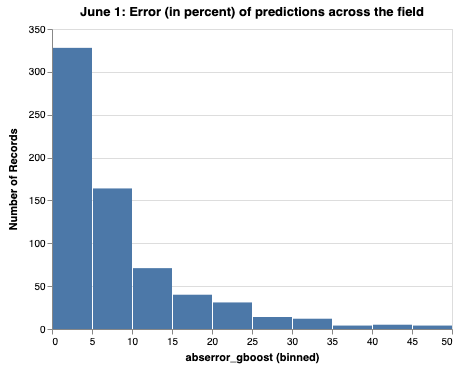

In [27]:
alt.Chart(closer_predicts,title="June 1: Error (in percent) of predictions across the field").mark_bar().encode(
    alt.X("abserror_gboost:Q", bin=True),
    y='count()',
)

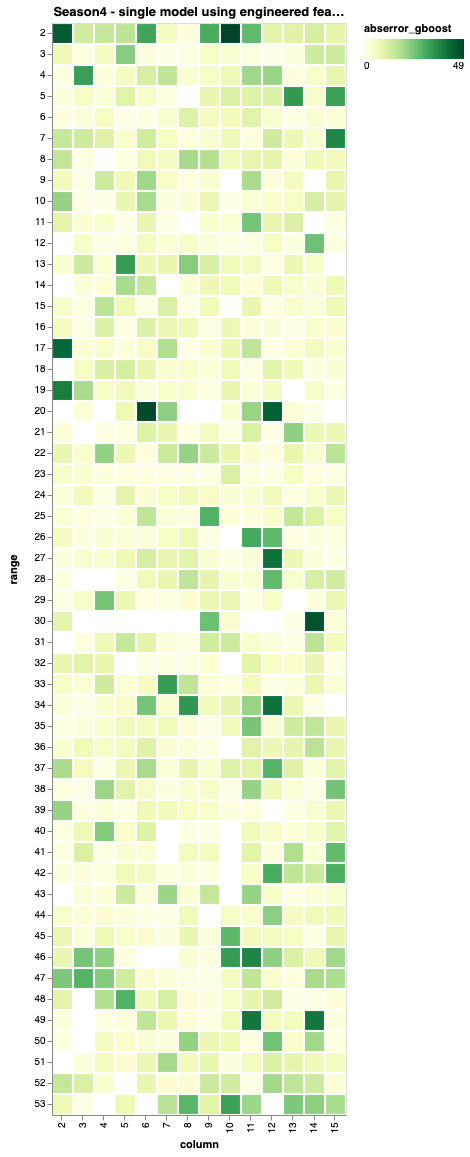

In [37]:
import altair as alt
alt.Chart(closer_predicts,title='Season4 - single model using engineered features').mark_rect().encode(
    x='column:O',
    y='range:O',
    color=alt.Color('abserror_gboost',scale=alt.Scale(scheme='yellowgreen')),
    tooltip=[
        #alt.Tooltip('cultivar:Q', title='Cultivar'),
        alt.Tooltip('abserror_gboost', title='Abs Err %'),
        alt.Tooltip('range',title='range'),
        alt.Tooltip('column',title='column')
    ]
)

In [29]:
outliers = plotdf.loc[plotdf['abserror_gboost']>100.0]
outliers

planter_seed_drop  seedling_emergence_rate  emergence_count  \
29                57.5                 0.813284        56.501741   
46                71.5                 0.813284        56.501741   
132               61.0                 0.813284        56.501741   
226               73.5                 0.813284        56.501741   
233               65.0                 0.813284        56.501741   
339               63.0                 0.813284        56.501741   
421               68.0                 0.813284        56.501741   
447               50.0                 0.813284        56.501741   
615               73.5                 0.813284        56.501741   
640               72.5                 0.813284        56.501741   

     canopy_height  canopy_height_diff  plant_basal_tiller_number  \
29            53.0            2.083333                   3.477941   
46            52.0            2.083333                   3.477941   
132           53.0            2.083333                   3.477941   
226           54.5            2.083333                   3.477941   
233           64.0            2.083333                   3.477941   
339           45.5            2.083333                   3.477941   
421           38.0            2.083333                   3.477941   
447           76.0            2.083333                   3.477941   
615           59.5            2.083333                   3.477941   
640           47.5            2.083333                   3.477941   

     stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
29                                 0.335326     42.946154         26.0   
46                                 0.335326     42.946154         24.5   
132                                0.335326     42.946154         26.0   
226                                0.335326     42.946154         25.5   
233                                0.335326     42.946154         27.5   
339                                0.335326     42.946154         25.5   
421                                0.335326     42.946154         24.0   
447                                0.335326     42.946154         20.5   
615                                0.335326     42.946154         25.0   
640                                0.335326     42.946154         27.0   

     stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
29                   10.807857                  15.435048   57.536275   
46                   10.807857                  15.435048   57.536275   
132                  10.807857                  15.435048   57.536275   
226                  10.807857                  15.435048   57.536275   
233                  10.807857                  15.435048   57.536275   
339                  10.807857                  15.435048   57.536275   
421                  10.807857                  15.435048   57.536275   
447                  10.807857                  15.435048   57.536275   
615                  10.807857                  15.435048   57.536275   
640                  10.807857                  15.435048   57.536275   

     leaf_length  aboveground_dry_biomass  range  column  decision_tree  \
29    597.034314                   2252.0     12       2   21970.744318   
46    597.034314                   7152.0     14       7   21970.744318   
132   597.034314                   4039.0     26      10   21970.744318   
226   597.034314                   1466.0     43      10   21970.744318   
233   597.034314                   6628.0     44       9   25082.515528   
339   597.034314                   5968.0      8       4   21970.744318   
421   597.034314                   1673.0      9      10    3966.000000   
447   597.034314                   1137.0     14       2   26113.500000   
615   597.034314                   3605.0     39      12   25082.515528   
640   597.034314                   2734.0     42      10   21970.744318   

     linearRegression        gboost  abserror_gboos

Let's do a plot of the aboveground_dry_biomass and see if it correlates with the canopy_height

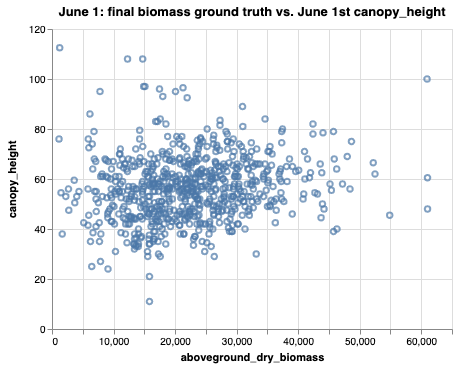

In [39]:
alt.Chart(plotdf,title="June 1: final biomass ground truth vs. June 1st canopy_height").mark_point().encode(
    alt.X("aboveground_dry_biomass:Q"),
    alt.Y("canopy_height:Q"),
    tooltip=[
        #alt.Tooltip('cultivar:O', title='Cultivar'),
        alt.Tooltip('abserror_gboost', title='Abs Err %'),
        alt.Tooltip('range',title='range'),
        alt.Tooltip('column',title='column')
    ]
)

In [61]:
# Seaborn complains on some systems, so just supress the warnings
import warnings
warnings.filterwarnings('ignore')

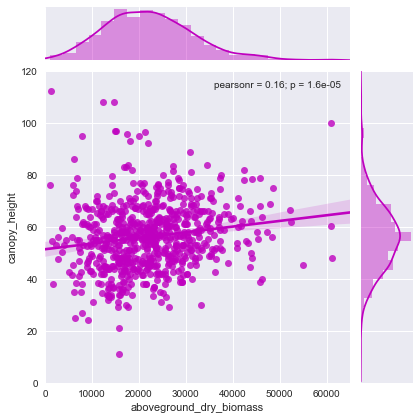

In [62]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot("aboveground_dry_biomass", "canopy_height", data=plotdf,
                  kind="reg", truncate=False,
                  xlim=(0, 65000), ylim=(0, 120),
                  color="m")

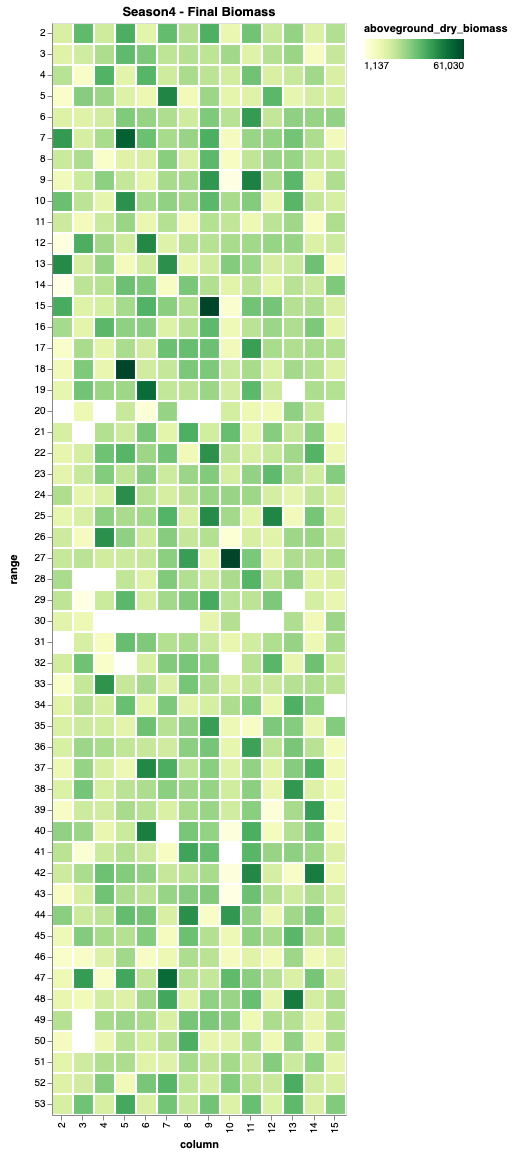

In [43]:
import altair as alt
alt.Chart(plotdf,title='Season4 - Final Biomass').mark_rect().encode(
    x='column:O',
    y='range:O',
    #color='aboveground_dry_biomass',
    color=alt.Color('aboveground_dry_biomass',scale=alt.Scale(scheme='yellowgreen')),
    tooltip=[
        alt.Tooltip('aboveground_dry_biomass:Q', title='Final Biomass'),
        alt.Tooltip('abserror_gboost', title='Abs Err %'),
        alt.Tooltip('range',title='range'),
        alt.Tooltip('column',title='column')
    ]
)

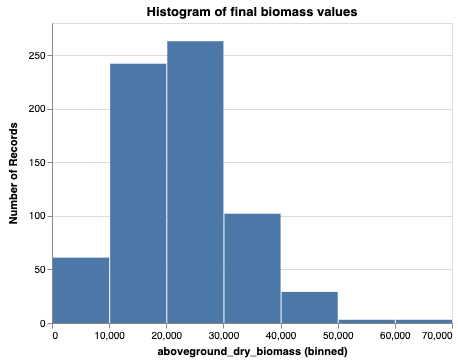

In [44]:
alt.Chart(plotdf,title="Histogram of final biomass values").mark_bar().encode(
    alt.X("aboveground_dry_biomass:Q", bin=True),
    y='count()',
)

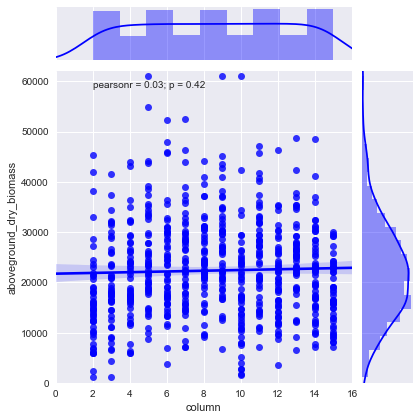

In [63]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot("column","aboveground_dry_biomass", data=plotdf,
                  kind="reg", truncate=False,
                  xlim=(0, 16), ylim=(0, 62000),
                  color="b")

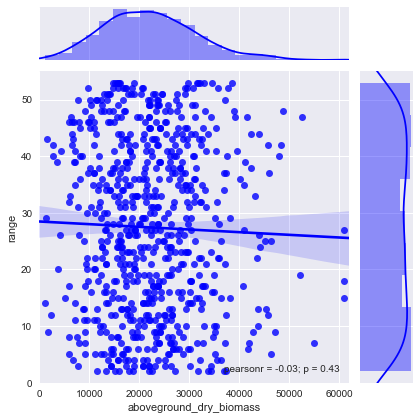

In [64]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot("aboveground_dry_biomass", "range",data=plotdf,
                  kind="reg", truncate=False,
                  xlim=(0, 62000), ylim=(0, 55),
                  color="b")

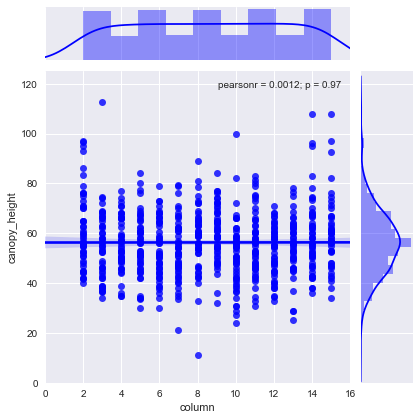

In [65]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot("column","canopy_height", data=plotdf,
                  kind="reg", truncate=False,
                  xlim=(0, 16), ylim=(0, 125),
                  color="b")

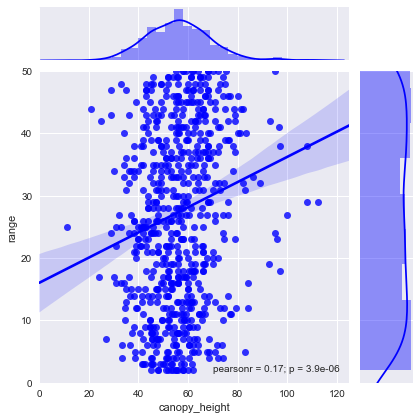

In [66]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.jointplot("canopy_height","range", data=plotdf,
                  kind="reg", truncate=False,
                  xlim=(0, 125), ylim=(0, 50),
                  color="b")

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
#import xgboost


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


tree = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
#svm_mod = svm.SVR().fit(X_train, y_train)
gbr_mod = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls').fit(X_train, y_train)

pred_tree = tree.predict(X_train)
pred_lr = linear_reg.predict(X_train)
#pred_svm = svm_mod.predict(X_train)
pred_gbr = gbr_mod.predict(X_train)


In [50]:
result = train_df
result['aboveground_dry_biomass'] = drop_target_na['aboveground_dry_biomass']
result['range'] = drop_target_na['range']
result['column'] = drop_target_na['column']
result['decision_tree'] = pred_tree
result['linearRegression'] = pred_lr
#cdf['svm'] = pred_svm
result['gboost'] = pred_gbr
result.head()

planter_seed_drop  seedling_emergence_rate  emergence_count  canopy_height  \
0               73.0                 0.813284        56.501741           46.5   
1               76.0                 0.813284        56.501741           55.5   
2               54.0                 0.376500        19.000000           50.5   
3               61.0                 0.813284        56.501741           59.0   
4               35.5                 0.813284        56.501741           46.0   

   canopy_height_diff  plant_basal_tiller_number  \
0            2.083333                   3.477941   
1            2.083333                   3.477941   
2            2.083333                   3.477941   
3            2.083333                   3.477941   
4            2.083333                   3.500000   

   stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
0                                0.335326     42.946154         22.0   
1                                0.335326     42.946154         25.0   
2                                0.335326     27.400000         17.5   
3                                0.335326     42.946154         22.5   
4                                0.335326     37.950000         24.5   

   stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
0                  10.807857                  15.435048   57.536275   
1                  10.807857                  15.435048   57.536275   
2                  10.807857                  15.435048   57.536275   
3                  10.807857                  15.435048   57.536275   
4                   8.920000                  14.360000   45.500000   

   leaf_length  aboveground_dry_biomass  range  column  decision_tree  \
0   597.034314                  15460.0      8       8   28327.647059   
1   597.034314                  34810.0      8       9   21970.744318   
2   597.034314                   7531.0      8      10    7531.000000   
3   597.034314                  25720.0      8      12   26113.500000   
4   555.000000                  18450.0      9       3   15926.500000   

   linearRegression        gboost  abserror_gboost  
0      23126.175253  18408.661874        19.072845  
1      23014.425244  28814.284727        17.224117  
2      20477.566716   8050.358999         6.896282  
3      23648.454637  23308.984731         9.374087  
4      17812.324815  18405.674028         0.240249

In [51]:
plotdf = result
# calculate the percentage error between the actual and the model
plotdf['abserror_gboost'] = 100.0*abs(plotdf['aboveground_dry_biomass']-plotdf['gboost'])/plotdf['aboveground_dry_biomass']
plotdf.head()

planter_seed_drop  seedling_emergence_rate  emergence_count  canopy_height  \
0               73.0                 0.813284        56.501741           46.5   
1               76.0                 0.813284        56.501741           55.5   
2               54.0                 0.376500        19.000000           50.5   
3               61.0                 0.813284        56.501741           59.0   
4               35.5                 0.813284        56.501741           46.0   

   canopy_height_diff  plant_basal_tiller_number  \
0            2.083333                   3.477941   
1            2.083333                   3.477941   
2            2.083333                   3.477941   
3            2.083333                   3.477941   
4            2.083333                   3.500000   

   stem_elongated_internodes_number_slope  canopy_cover  stand_count  \
0                                0.335326     42.946154         22.0   
1                                0.335326     42.946154         25.0   
2                                0.335326     27.400000         17.5   
3                                0.335326     42.946154         22.5   
4                                0.335326     37.950000         24.5   

   stalk_diameter_minor_axis  stalk_diameter_major_axis  leaf_width  \
0                  10.807857                  15.435048   57.536275   
1                  10.807857                  15.435048   57.536275   
2                  10.807857                  15.435048   57.536275   
3                  10.807857                  15.435048   57.536275   
4                   8.920000                  14.360000   45.500000   

   leaf_length  aboveground_dry_biomass  range  column  decision_tree  \
0   597.034314                  15460.0      8       8   28327.647059   
1   597.034314                  34810.0      8       9   21970.744318   
2   597.034314                   7531.0      8      10    7531.000000   
3   597.034314                  25720.0      8      12   26113.500000   
4   555.000000                  18450.0      9       3   15926.500000   

   linearRegression        gboost  abserror_gboost  
0      23126.175253  18408.661874        19.072845  
1      23014.425244  28814.284727        17.224117  
2      20477.566716   8050.358999         6.896282  
3      23648.454637  23308.984731         9.374087  
4      17812.324815  18405.674028         0.240249

Here is the error plot for the outcome of fitting the model using the 17 variables we engineered 

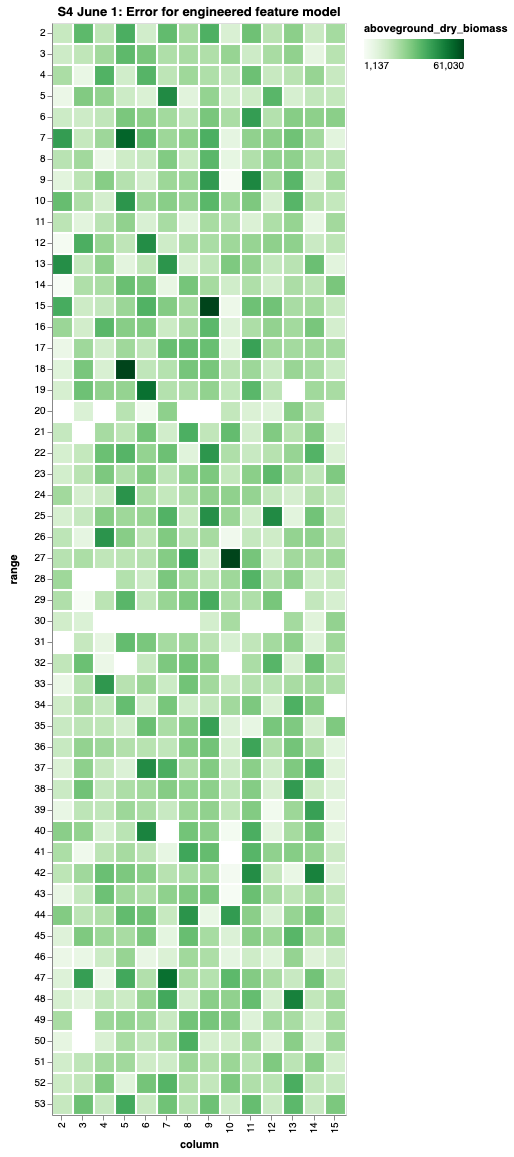

In [53]:
import altair as alt
alt.Chart(plotdf,title='S4 June 1: Error for engineered feature model').mark_rect().encode(
    x='column:O',
    y='range:O',
    color=alt.Color('aboveground_dry_biomass',scale=alt.Scale(scheme='greens')),
    tooltip=[
        alt.Tooltip('aboveground_dry_biomass:Q', title='Final Biomass'),
        alt.Tooltip('abserror_gboost', title='Abs Err %'),
        alt.Tooltip('range',title='range'),
        alt.Tooltip('column',title='column')
    ]
)

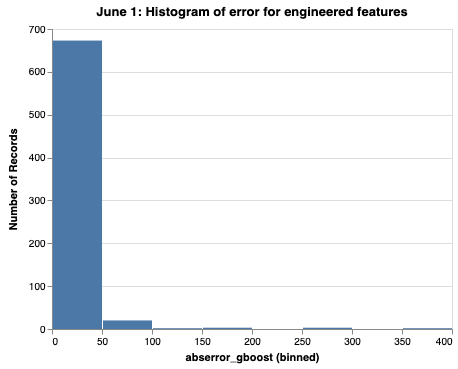

In [54]:
alt.Chart(plotdf,title="June 1: Histogram of error for engineered features").mark_bar().encode(
    alt.X("abserror_gboost:Q", bin=True),
    y='count()',
)

Overall, the model fits the majority of cultivar locations well.  There are a few places, where it fails spectacularly.  Let's mask off the outliers to see what the remainder looks like, when we limit error to bins < 50cm

In [55]:
closer_predicts = plotdf.loc[plotdf['abserror_gboost']<50.0]
print("total number of measurements:",plotdf.shape[0])
print("remaining measurements after outlier removal:",closer_predicts.shape[0])

total number of measurements: 703
remaining measurements after outlier removal: 673


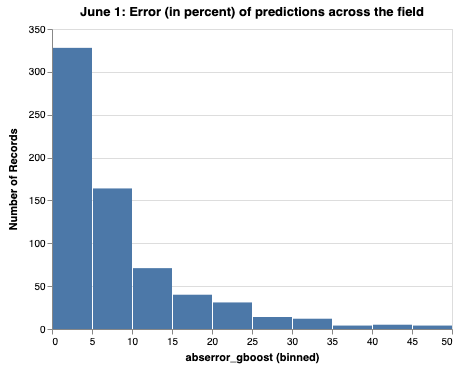

In [56]:
alt.Chart(closer_predicts,title="June 1: Error (in percent) of predictions across the field").mark_bar().encode(
    alt.X("abserror_gboost:Q", bin=True),
    y='count()',
)

In [57]:
closer_predicts['abserror_gboost'].mean()

8.034992089442914

In [58]:
for name, importance in zip(train_df.columns, gbr_mod.feature_importances_):
        print(name, "=", importance)

planter_seed_drop = 0.3051253385170441
seedling_emergence_rate = 0.0329329446207741
emergence_count = 0.030095074155688607
canopy_height = 0.2974835599585564
canopy_height_diff = 0.020092237426529165
plant_basal_tiller_number = 0.0027556655987064425
stem_elongated_internodes_number_slope = 0.0009923291215303738
canopy_cover = 0.05394204492613399
stand_count = 0.23673478324486974
stalk_diameter_minor_axis = 0.010246313660762127
stalk_diameter_major_axis = 0.0030050479573752935
leaf_width = 0.004025542276506549
leaf_length = 0.0025691185355232672


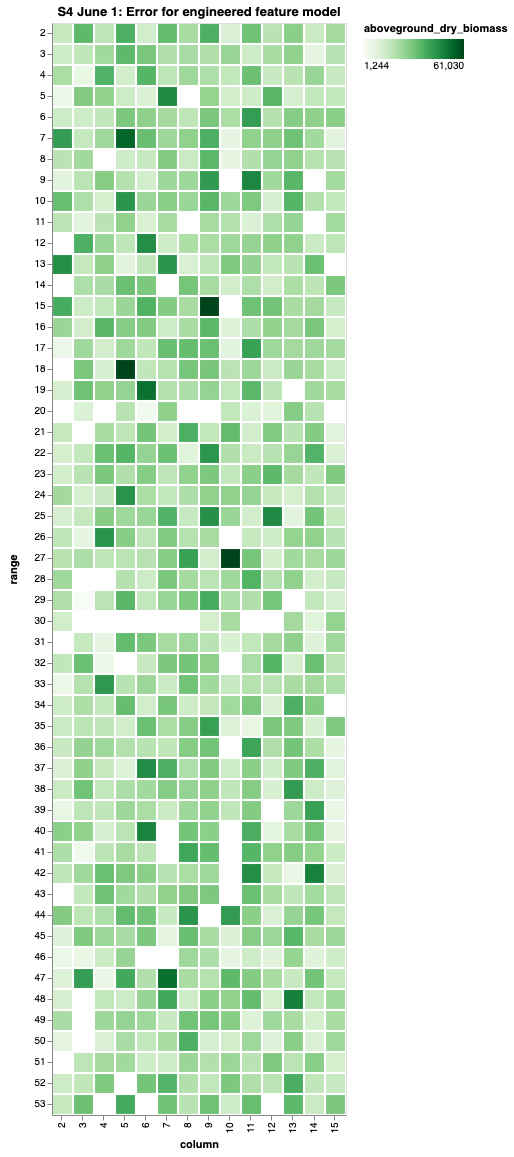

In [60]:
import altair as alt
alt.Chart(closer_predicts,title='S4 June 1: Error for engineered feature model').mark_rect().encode(
    x='column:O',
    y='range:O',
    color=alt.Color('aboveground_dry_biomass',scale=alt.Scale(scheme='greens')),
    tooltip=[
        alt.Tooltip('aboveground_dry_biomass:Q', title='Final Biomass'),
        alt.Tooltip('abserror_gboost', title='Abs Err %'),
        alt.Tooltip('range',title='range'),
        alt.Tooltip('column',title='column')
    ]
)